<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Model_Predict_Placment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Placement.csv")
df

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0
...,...,...,...,...
95,96,4.3,200,0
96,97,4.4,42,0
97,98,6.7,182,1
98,99,6.3,103,1


In [3]:
df.shape

(100, 4)

In [10]:
df.Placement.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: Placement, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


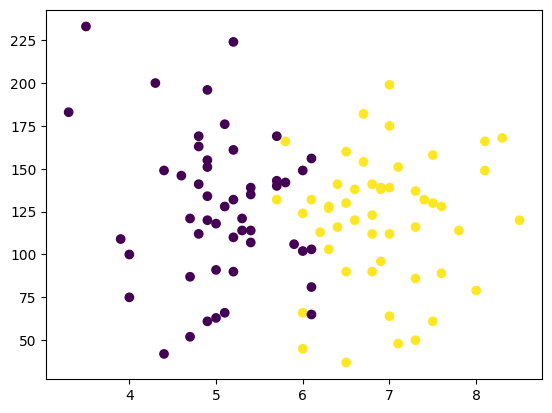

In [5]:
# lets see the data points on plot:
plt.scatter(df.CGPA,df.IQ,c=df.Placement)

In [7]:
X = df.iloc[:,:2]
y = df['Placement']
display(X,y)

,Student_ID,CGPA
0,1,6.8
1,2,5.9
2,3,5.3
3,4,7.4
4,5,5.8
...,...,...
95,96,4.3
96,97,4.4
97,98,6.7
98,99,6.3


0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [17]:
model = LogisticRegression()
model

LogisticRegression()

In [51]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
# We use standard scaling because we have iq frm range 50 - 250 and cgpa is in decimal
# After using standard scaler its puts both fetatures values equally means each features have mean 0 and std 1
# This will help to improve the performance of model
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler

StandardScaler()

In [53]:
x_train = scaler.fit_transform(x_train)

In [54]:
x_train

array([[ 0.14721733,  1.64027754],
       [ 1.29031656, -1.44090679],
       [-0.85732443,  0.91529299],
       [-0.30309449,  1.4590314 ],
       [ 0.63216852,  2.27463902],
       [-1.23835751, -0.80654531],
       [-0.37237324, -0.98779145],
       [ 1.56743153, -1.44090679],
       [-1.44619373, -0.80654531],
       [ 0.73608663,  1.1871622 ],
       [-1.37691499,  0.82466992],
       [-0.12989764, -0.71592224],
       [ 1.18639845, -0.17218383],
       [-0.78804569, -0.71592224],
       [ 1.46351342,  0.73404686],
       [-1.58475122,  1.00591606],
       [ 0.52825041,  0.82466992],
       [ 0.49361103,  1.91214675],
       [-0.54557009,  0.73404686],
       [-1.20371814, -0.71592224],
       [-0.0606189 , -0.5346761 ],
       [-0.58020946, -1.07841452],
       [-1.51547247, -0.89716838],
       [ 1.53279216, -1.53152986],
       [-0.82268506,  0.00906231],
       [-1.09980002, -0.71592224],
       [ 1.04784097, -0.5346761 ],
       [-0.8919638 , -0.89716838],
       [ 0.38969292,

In [55]:
x_test = scaler.fit_transform(x_test)

In [56]:
x_test

array([[ 1.36003351,  1.18851701],
       [ 0.30026714,  1.82028686],
       [ 0.90080142,  0.24086225],
       [ 0.01766277,  0.00394856],
       [-0.01766277,  1.18851701],
       [-0.1942905 , -1.10164866],
       [-0.79482478, -0.86473497],
       [ 1.25405687, -0.86473497],
       [-1.21873133,  0.00394856],
       [-1.57198678,  0.6357184 ],
       [-0.93612696, -1.57547604],
       [-0.51222041,  1.26748824],
       [ 1.00677805, -0.86473497],
       [-0.40624378,  0.00394856],
       [ 1.60731233,  1.03057455],
       [-1.4306846 , -0.1539939 ],
       [ 1.11275469, -0.86473497],
       [ 1.14808024,  1.03057455],
       [-1.14808024, -0.46987882],
       [-0.47689487, -1.65444727]])

In [57]:
# train:
model.fit(x_train,y_train)

LogisticRegression()

In [58]:
# testing:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [59]:
y_test.values

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [60]:
# data accuracy:
model.score(x_train,y_train)*100

93.75

In [61]:
# performance measures:
accuracy_score(y_test,y_pred)*100

90.0

In [62]:
# confusion_matrix:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[10,  0],
       [ 2,  8]])

Here we have Total 20 students who placed or not accoridng to data

10 students are not placed and 10 students are placed:

Out of 10 students --> model predicts that 10 students are not placed this statements lies under True Negative Category

Out of 10 studenst model predicts that 8 gots placments --> True Positive

Remaining 2 studenst who actually placed but model predicting that they are not placed --> Wrongly Negative --> False Negative




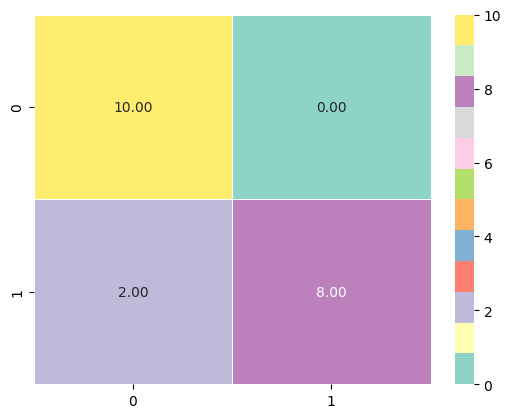

In [66]:
sns.heatmap(data=con_mat,annot=True,fmt=".2f",linewidth=0.6,linecolor="white",cmap="Set3")
print(f"Here we have Total 20 students who placed or not accoridng to data\n")
print(f"10 students are not placed and 10 students are placed:\n")
print(f"Out of 10 students --> model predicts that 10 students are not placed this statements lies under True Negative Category\n")
print(f"Out of 10 studenst model predicts that 8 gots placments --> True Positive\n")
print(f"Remaining 2 studenst who actually placed but model predicting that they are not placed --> Wrongly Negative --> False Negative\n\n")

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



In [67]:
# lets see the accuracy of positive prediction done by the model:
precision_score(y_test,y_pred)*100

100.0

In [68]:
# lets see the accuracy of negatively prediction done by model
recall_score(y_test,y_pred)*100

80.0

In [69]:
from mlxtend.plotting import plot_decision_regions
# this library used to plot the classificational outputs seperately

<Axes: >

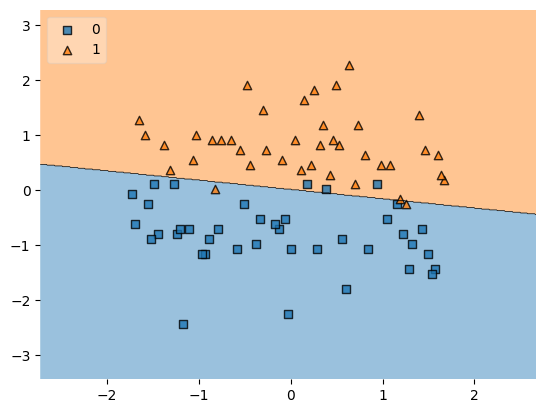

In [70]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

In [73]:
import pickle
# Pickle is used to convert model into file and this file will use in other environment
# Lets see how we can do this...

In [72]:
pickle.dump(model,open('model.pkl','wb'))